# Colouring anomaly data with logarithmic scaling

In this example, we need to plot anomaly data where the values have a “logarithmic” significance – i.e. we want to give approximately equal ranges of colour between data values of, say, 1 and 10 as between 10 and 100.

As the data range also contains zero, that obviously does not suit a simple logarithmic interpretation. However, values of less than a certain absolute magnitude may be considered “not significant”, so we put these into a separate “zero band” which is plotted in white.

To do this, we create a custom value mapping function (normalization) using the matplotlib Norm class matplotlib.colours.SymLogNorm. We use this to make a cell-filled pseudocolour plot with a colorbar.

NOTE: By “pseudocolour”, we mean that each data point is drawn as a “cell” region on the plot, coloured according to its data value. This is provided in Iris by the functions iris.plot.pcolor() and iris.plot.pcolormesh(), which call the underlying matplotlib functions of the same names (i.e. matplotlib.pyplot.pcolor and matplotlib.pyplot.pcolormesh). See also: http://en.wikipedia.org/wiki/False_color#Pseudocolor.

In [1]:
import cartopy.crs as ccrs
import iris
import iris.coord_categorisation
import iris.plot as iplt
import matplotlib.pyplot as plt
import matplotlib.colors as mcols

Load a sample air temperatures sequence.

In [2]:
file_path = iris.sample_data_path('E1_north_america.nc')
temperatures = iris.load_cube(file_path)

Create a year-number coordinate from the time information.

In [3]:
iris.coord_categorisation.add_year(temperatures, 'time')

Create a sample anomaly field for one chosen year, by extracting that year and subtracting the time mean.

In [4]:
sample_year = 1982
year_temperature = temperatures.extract(iris.Constraint(year=sample_year))
time_mean = temperatures.collapsed('time', iris.analysis.MEAN)
anomaly = year_temperature - time_mean

/mnt/opt/conda/lib/python3.6/site-packages/iris/coords.py:1355: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'forecast_period'.
  warnings.warn(msg.format(self.name()))
/mnt/opt/conda/lib/python3.6/site-packages/iris/coords.py:1355: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'year'.
  warnings.warn(msg.format(self.name()))


Construct a plot title string explaining which years are involved.

In [5]:
years = temperatures.coord('year').points
plot_title = 'Temperature anomaly'
plot_title += '\n{} differences from {}-{} average.'.format(sample_year, years[0], years[-1])

Define scaling levels for the logarithmic colouring.

In [6]:
minimum_log_level = 0.1
maximum_scale_level = 3.0

Use a standard colour map which varies blue-white-red.

For suitable options, see the 'Diverging colormaps' section in http://matplotlib.org/examples/color/colormaps_reference.html

In [7]:
anom_cmap = 'bwr'

Create a 'logarithmic' data normalization.

Setting "linthresh=minimum_log_level" makes its non-logarithmic data range equal to our 'zero band'.
Setting "linscale=0" maps the whole zero band to the middle colour value (i.e. 0.5), which is the neutral point of a "diverging" style colormap.

In [8]:
anom_norm = mcols.SymLogNorm(linthresh=minimum_log_level,
                             linscale=0,
                             vmin=-maximum_scale_level,
                             vmax=maximum_scale_level)

Important: we need to turn off Matplotlib interactivity.
Otherwise, each separate cell will show a figure, and the underlying state is messed up (Matplotlib more or less loses the canvas it is plotting on).
Turning of interactivity (`plt.ioff()`) and then explicitly calling `plt.show()` at the end works fine.

An alternative is to run all the plotting code in a single cell (see the last cell), but then we can't intersperse Markdown cells.

In [9]:
plt.ioff()

Create an Axes, specifying the map projection.

In [10]:
plt.axes(projection=ccrs.LambertConformal());

Make a pseudocolour plot using this colour scheme.

In [11]:
mesh = iplt.pcolormesh(anomaly, cmap=anom_cmap, norm=anom_norm)

/mnt/opt/conda/lib/python3.6/site-packages/iris/coords.py:1138: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
/mnt/opt/conda/lib/python3.6/site-packages/iris/coords.py:1138: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))


Add a colourbar, with extensions to show handling of out-of-range values.

In [12]:
bar = plt.colorbar(mesh, orientation='horizontal', extend='both')

Set some suitable fixed "logarithmic" colourbar tick positions.

In [13]:
tick_levels = [-3, -1, -0.3, 0.0, 0.3, 1, 3]
bar.set_ticks(tick_levels)

Modify the tick labels so that the centre one shows "+/-<minumum-level>".

In [14]:
tick_levels[3] = r'$\pm${:g}'.format(minimum_log_level)
bar.set_ticklabels(tick_levels)

Label the colourbar to show the units.

In [15]:
bar.set_label('[{}, log scale]'.format(anomaly.units))

Add coastlines and a title.

In [16]:
#plt.gca().coastlines()
plt.title(plot_title)

Text(0.5, 1.0, 'Temperature anomaly\n1982 differences from 1860-2099 average.')

Display the result.

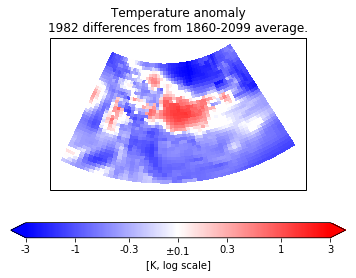

In [17]:
iplt.show()

Below is the alternative to using `plt.ioff()`.  
We turn intearctive plotting on again (`plt.ion()`), but execute all plot commands in a single cell.

In [18]:
plt.ion()

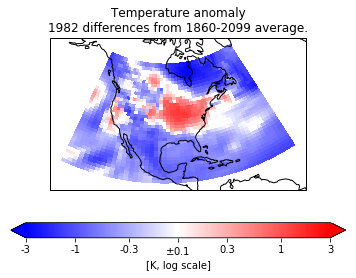

In [19]:
# Create an Axes, specifying the map projection.
plt.axes(projection=ccrs.LambertConformal())

# Make a pseudocolour plot using this colour scheme.
mesh = iplt.pcolormesh(anomaly, cmap=anom_cmap, norm=anom_norm)

# Add a colourbar, with extensions to show handling of out-of-range values.
bar = plt.colorbar(mesh, orientation='horizontal', extend='both')

# Set some suitable fixed "logarithmic" colourbar tick positions.
tick_levels = [-3, -1, -0.3, 0.0, 0.3, 1, 3]
bar.set_ticks(tick_levels)

# Modify the tick labels so that the centre one shows "+/-<minumum-level>".
tick_levels[3] = r'$\pm${:g}'.format(minimum_log_level)
bar.set_ticklabels(tick_levels)

# Label the colourbar to show the units.
bar.set_label('[{}, log scale]'.format(anomaly.units))

# Add coastlines and a title.
plt.gca().coastlines()
plt.title(plot_title)

plt.show()